# ------------  Predicting Heart Diseases using KNN-------------
The diseases in Heart include
1. Blood vessel disease
2. Heart rythm problems
3. Heart defects that children are sometimes born with

In this project we will apply Machine Learning to a Heart Disease dataset to classify if a person is suffering from heart disease or not
#### NOTE: "The purple text sections throughout this notebook present reports. These reports are carefully constructed summaries and interpretations, derived directly from the statistical scores—like the t-tests and chi-square tests—and the graphical visualizations we've explored."

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

### Exploratory Data Analysis
Here we will look at the data and try to understand it

In [2]:
# Creating a dataframe and loading the dataset
df_heart = pd.read_csv('heart_disease_dataset.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Displaying general information about the dataset
# We can see
# 1. Column index
# 2. Column names
# 3. Type of values (Null or Non Null)
# 4. Datatype of the variables
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Generating descriptive statistics for the dataset
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Generating a correlation matrix
correlation_mat = df_heart.corr()
correlation_mat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Feature Selection
Here we take a look at features that we can use in our model

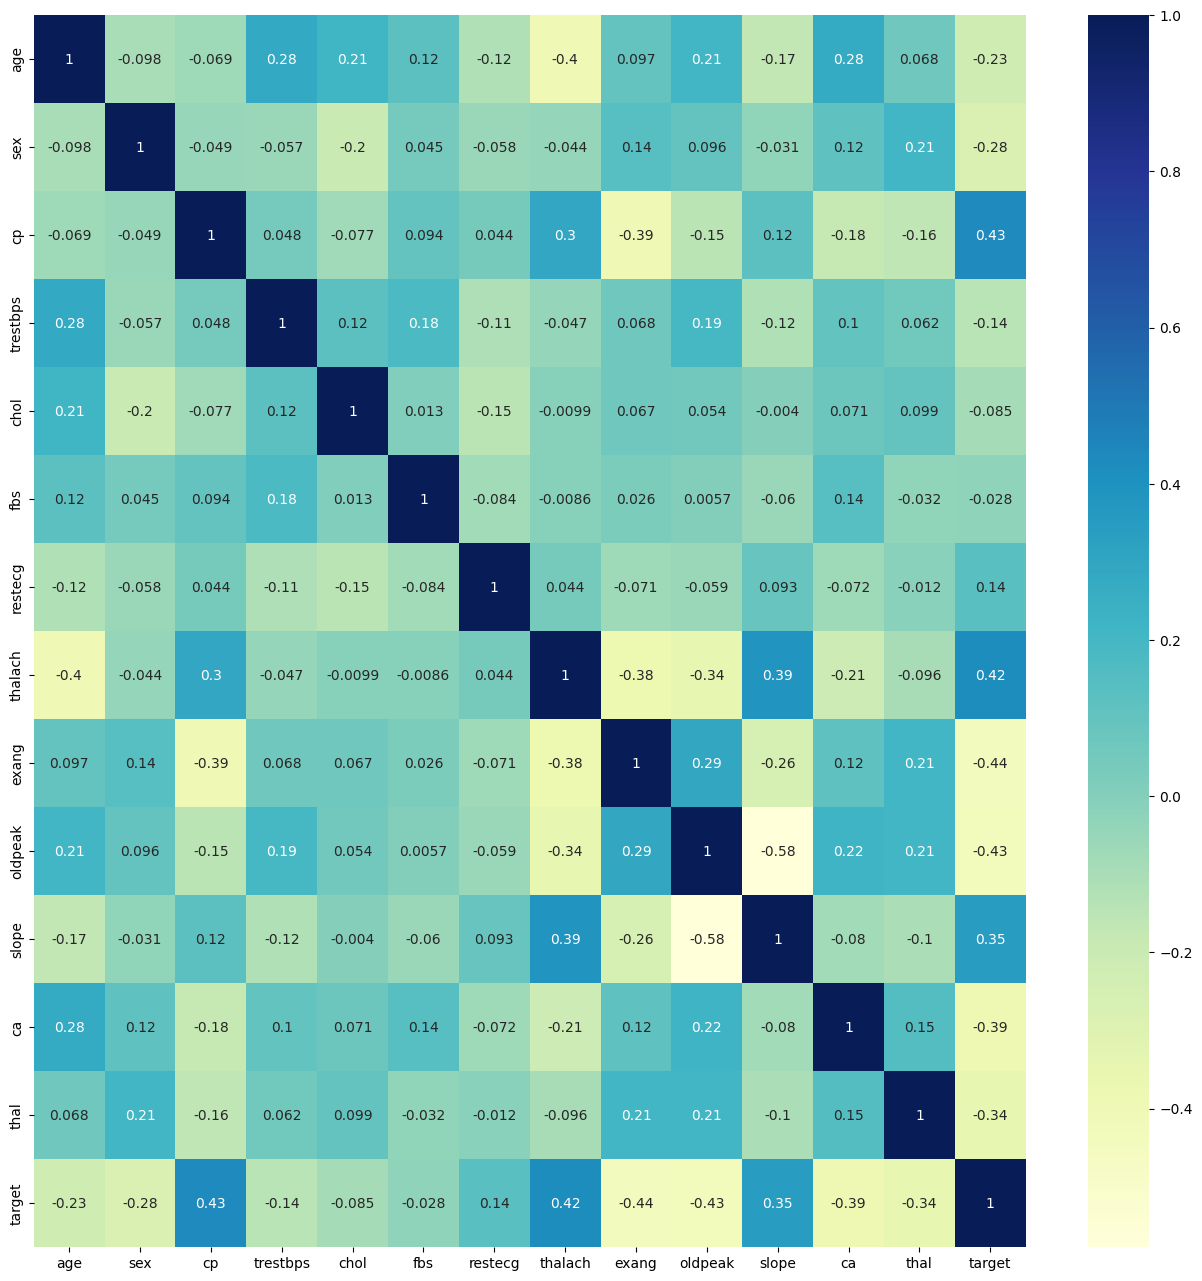

In [6]:
# Generating a correlational heatmap of the variables
top_correlation_features = correlation_mat.index
plt.figure(figsize = (16, 16))
correlation_heatmap = sns.heatmap(df_heart[top_correlation_features].corr(), annot = True, cmap = 'YlGnBu')
plt.show()

### <div style="color:purple;">Strong correlations: cp, thalach (positive); exang, oldpeak (negative) with target. Age, ca, show moderate links. Most others weakly correlation .</div>

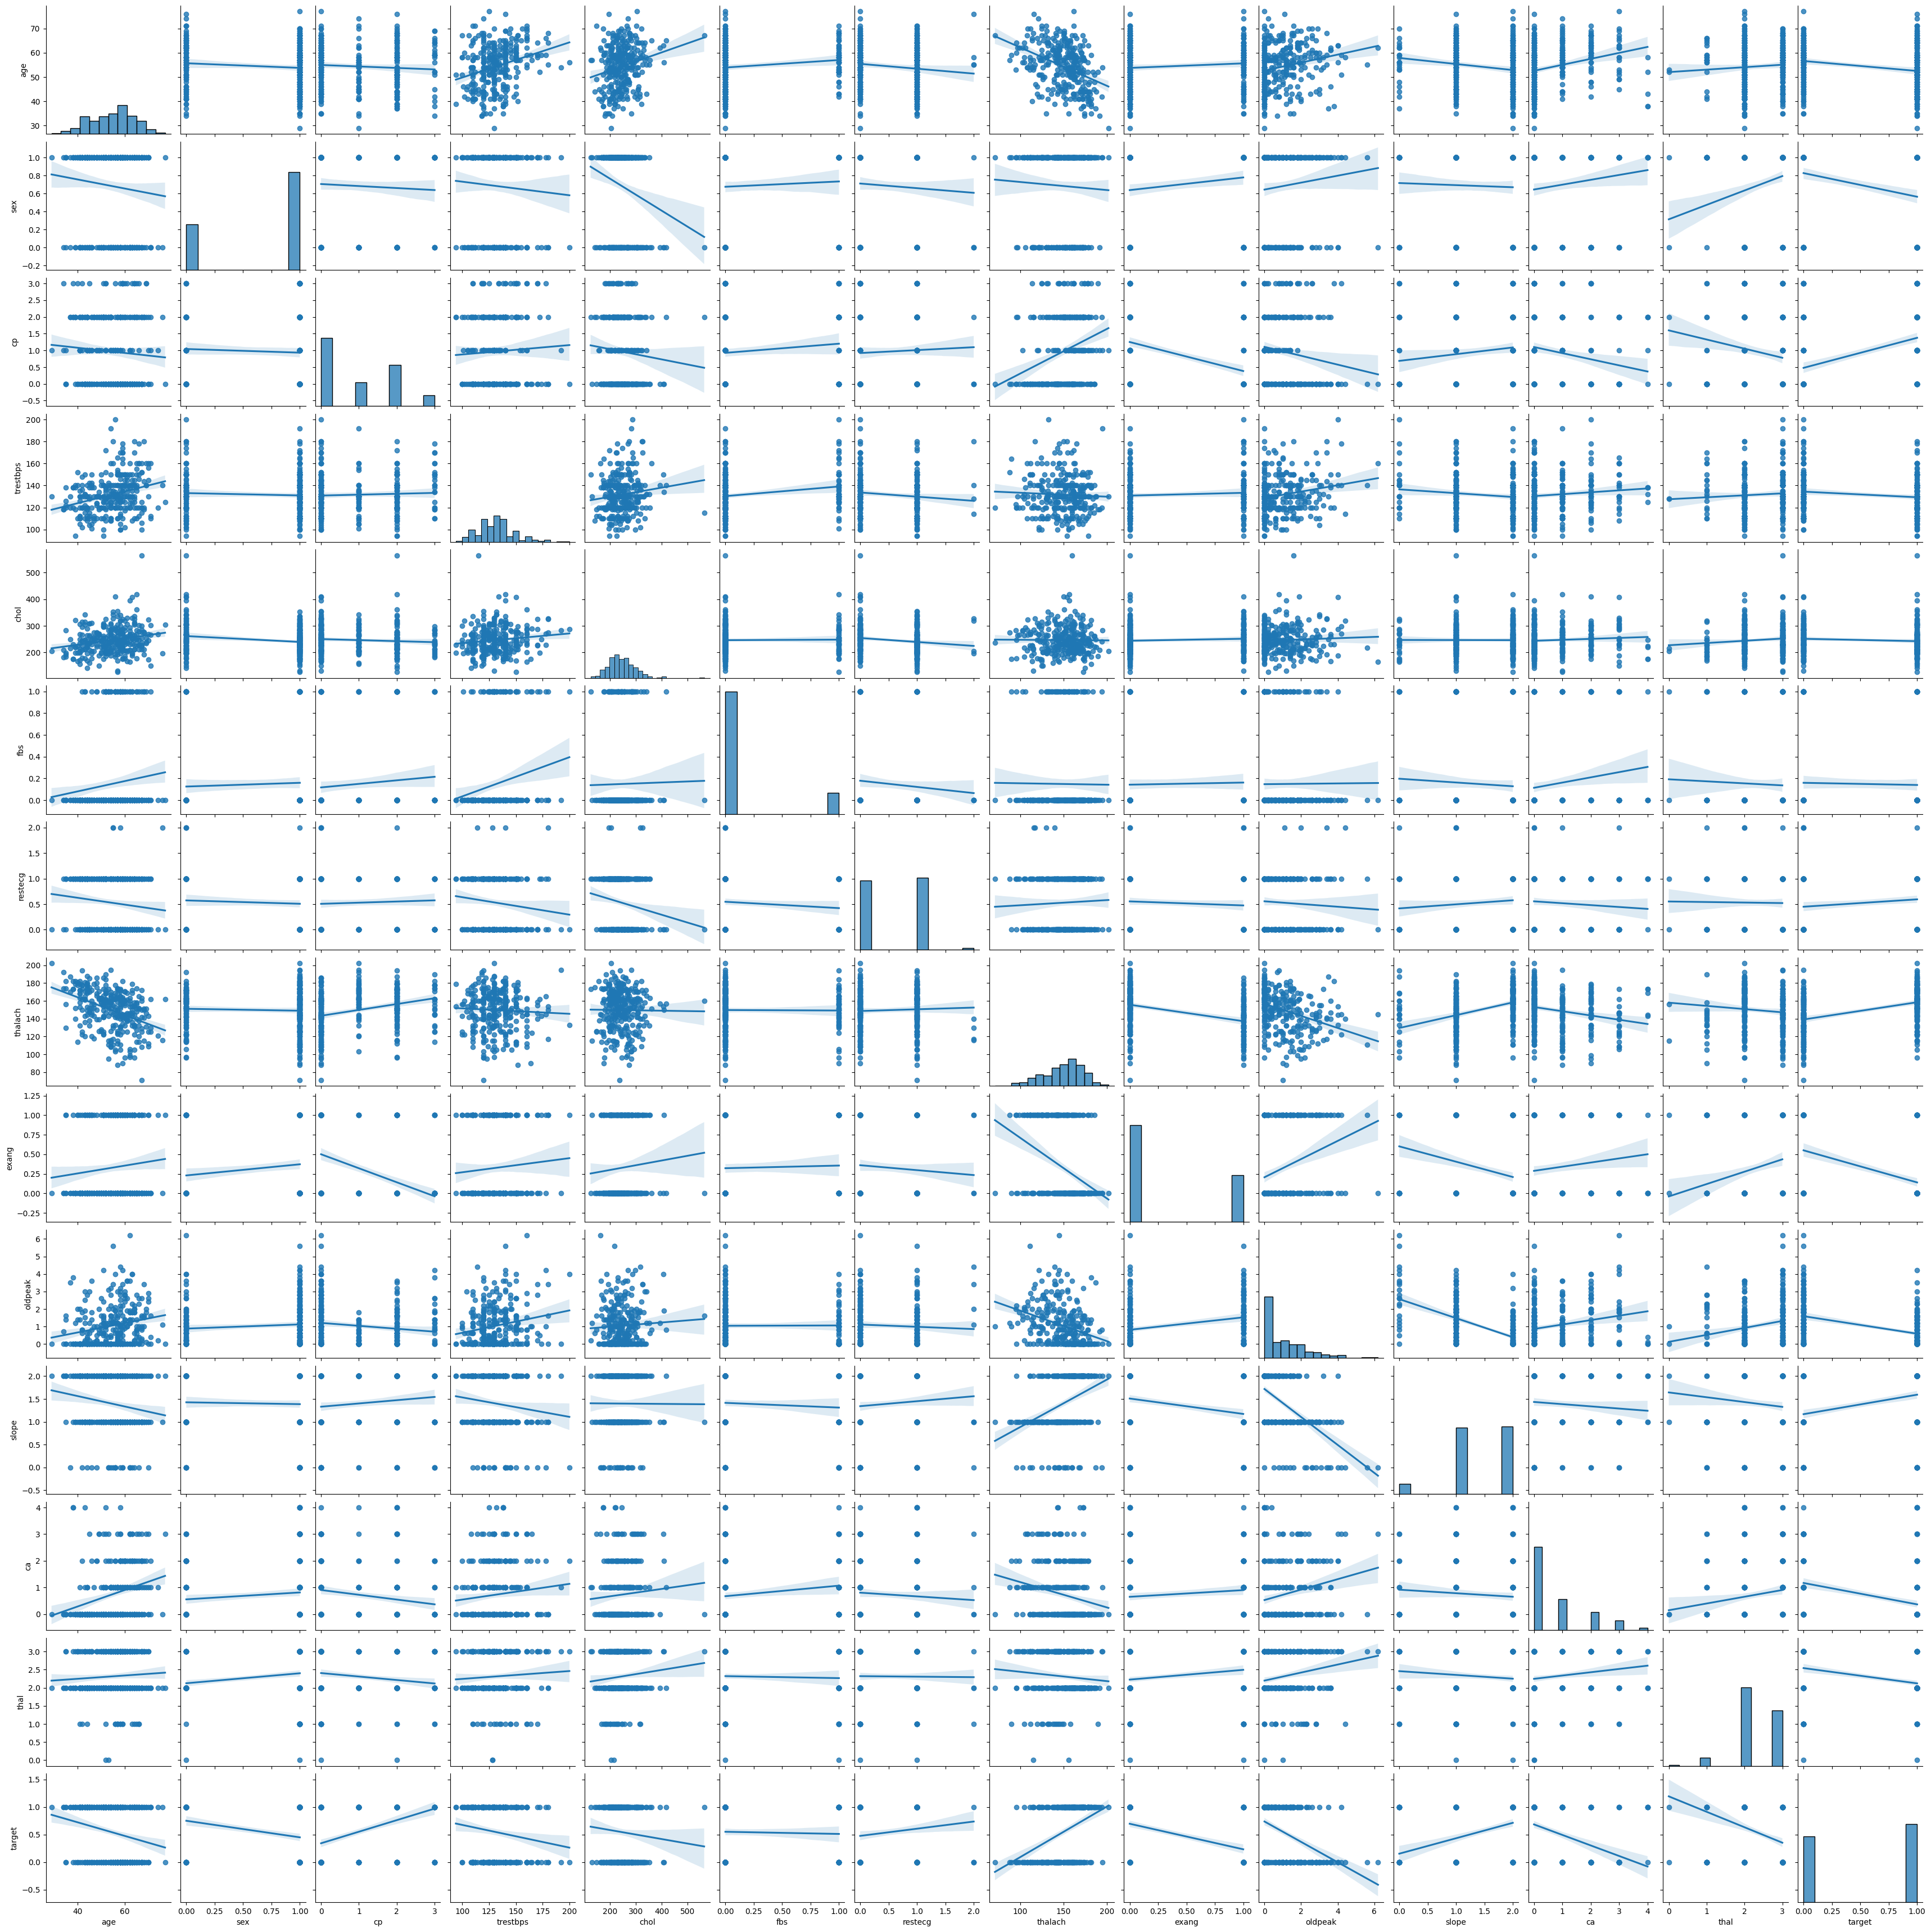

In [7]:
sns.pairplot(df_heart[top_correlation_features], kind = "reg")
plt.show()

### <div style="color:purple;">Scatterplots show 'cp', 'thalach' relate positively, 'exang', 'oldpeak' negatively to target. Histograms show feature distributions. Weak correlations elsewhere.
.</div>

<Axes: xlabel='target', ylabel='count'>

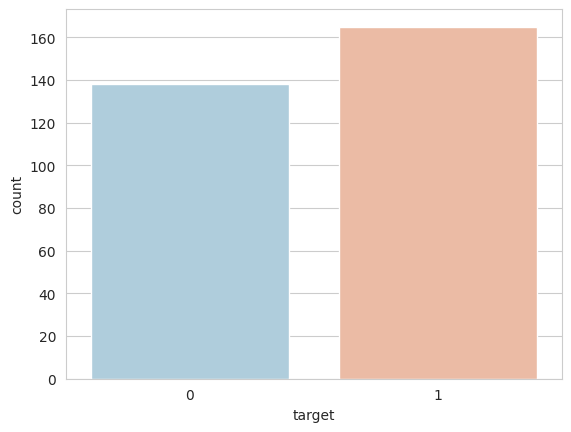

In [8]:
# Total count of target variables
sns.set_style('whitegrid')
sns.countplot(x = 'target', data = df_heart, palette = 'RdBu_r')

### <div style="color:purple;">Target variable shows a relatively balanced distribution, with slightly more occurrences of '1' than '0', suggesting a reasonably even split.</div>

### Data Pre-Procesing

In [9]:
# Importing required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [10]:
# Converting some categorical variables to dummy variables
dataset = pd.get_dummies(df_heart, columns = ['sex', 'cp',
                                              'fbs','restecg',
                                              'exang', 'slope',
                                              'ca', 'thal'])

# Scaling the values
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [11]:
# Splitting the values
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

### Developing and Training ML Models

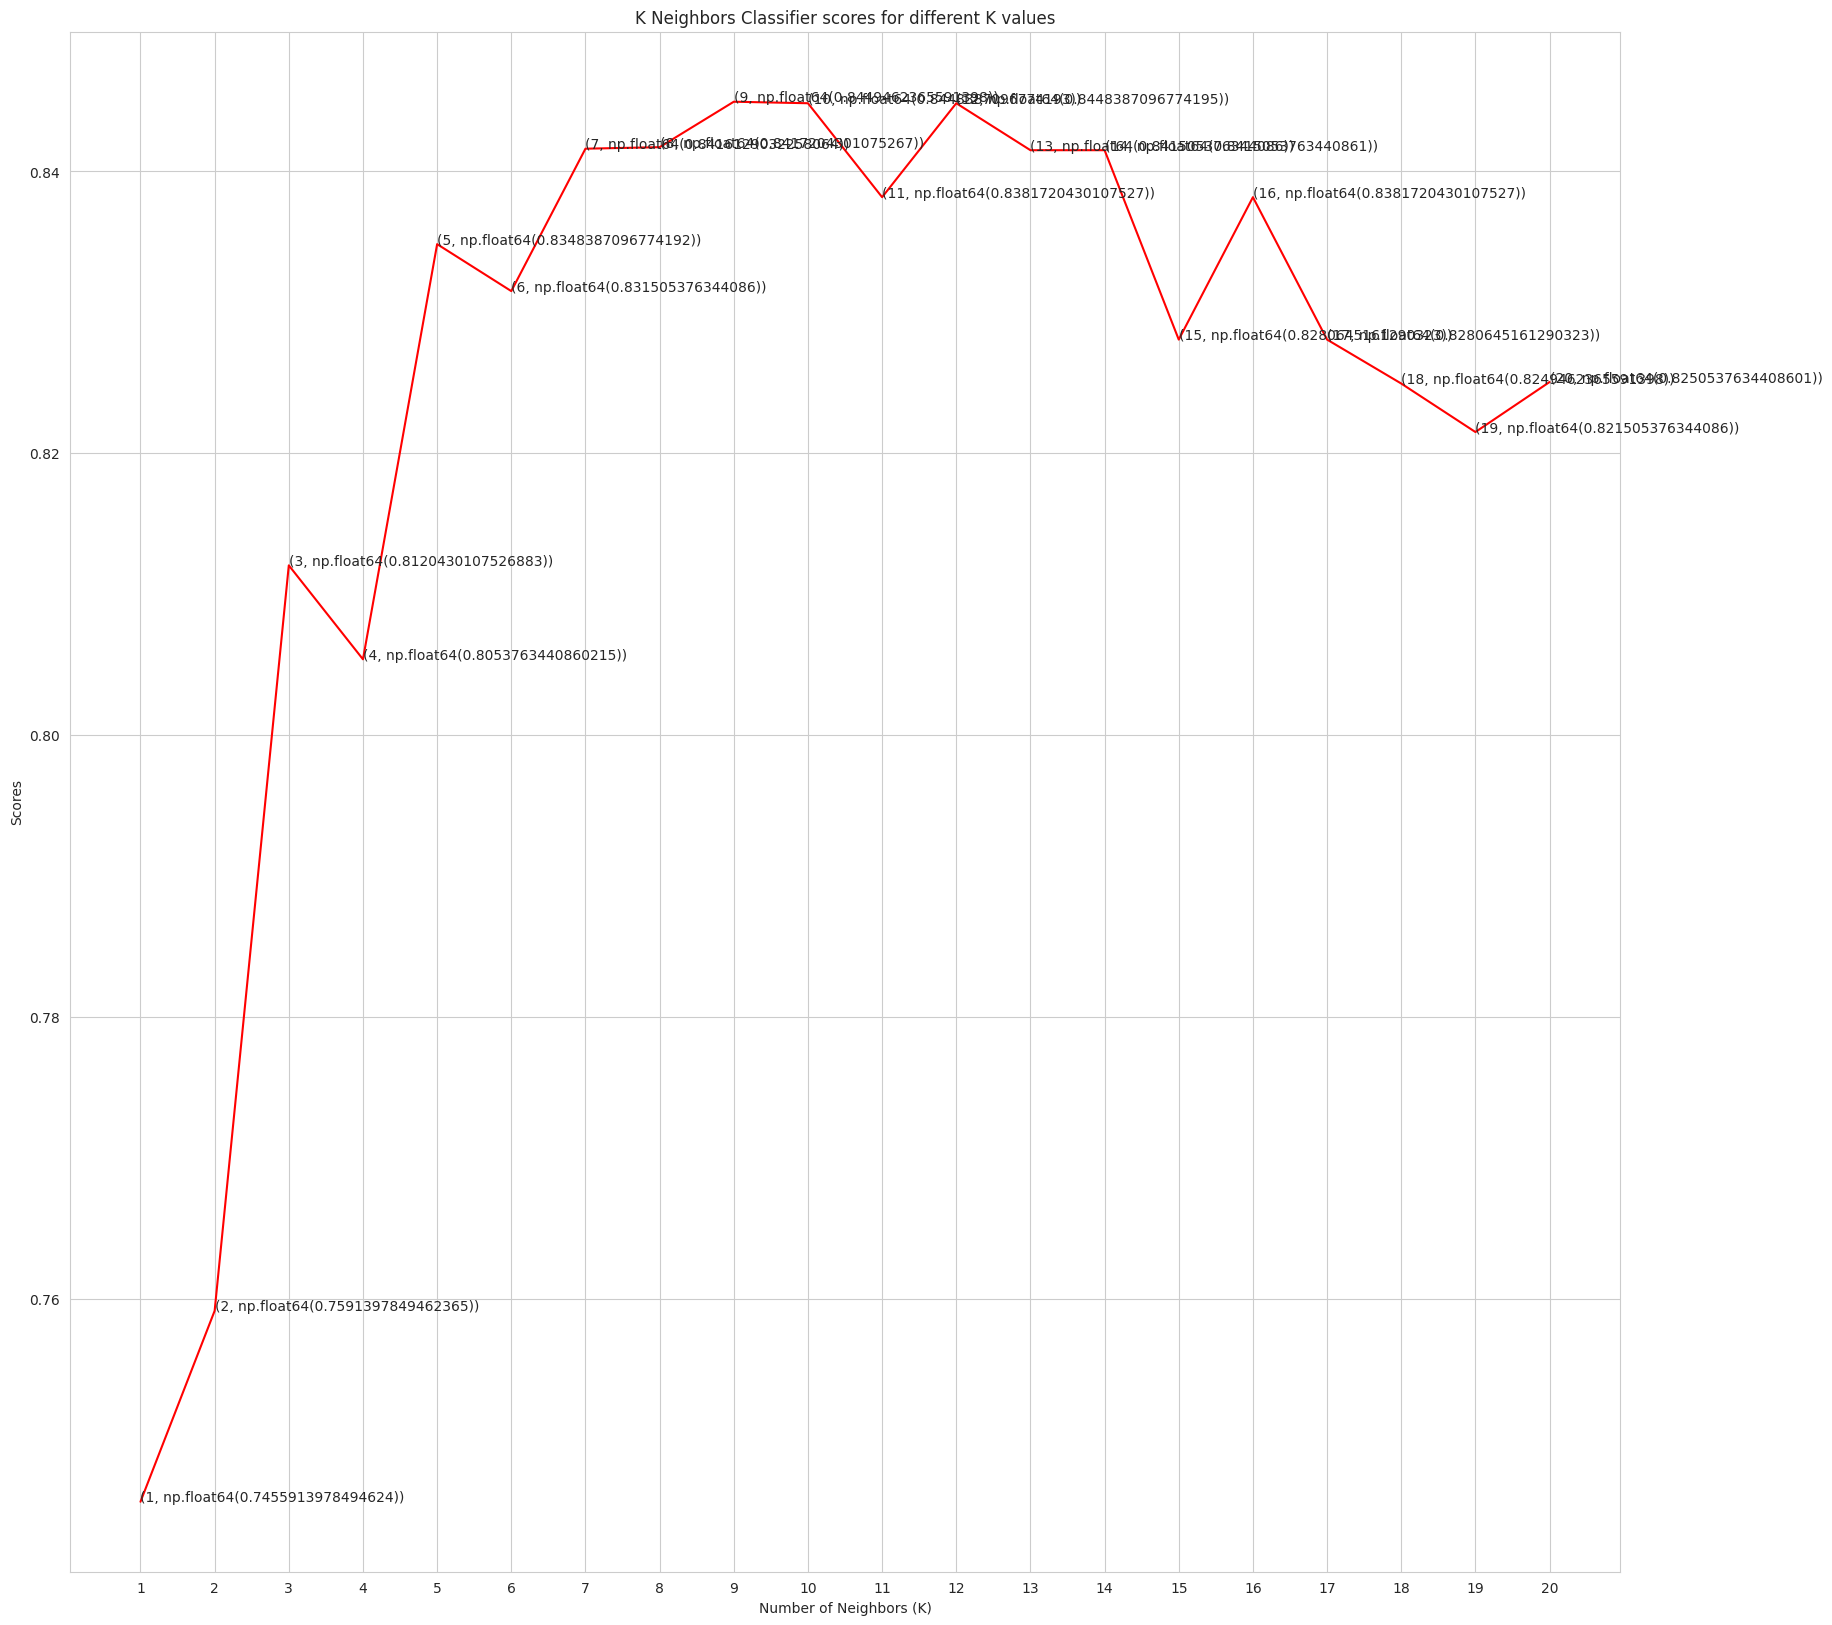

In [12]:
# Plotting the K Neighbors Classifier scores
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier, X, y, cv = 10)
    knn_scores.append(score.mean())

plt.figure(figsize = (20, 20))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')

for i in range(1, 21):
    plt.text(i, knn_scores[i - 1], (i, knn_scores[i - 1]))

plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

### <div style="color:purple;">Optimal KNN performance at K=8-12. Too few or too many neighbors hurt accuracy. Pick K in that range for best results.</div>

### Model Evaluation (K Neighbors Classifier, Random Forest Classifier)

In [13]:
# Training a K Neigbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 12)

# Calculating mean score of K Neighbors Classifier model
score = cross_val_score(knn_classifier, X, y, cv = 10)
score.mean()

np.float64(0.8448387096774195)

### <div style="color:purple;">This code trains a model that looks at the 12 closest data points to make predictions. It checks how well the model does by testing it on different parts of the data and gives an average accuracy score.</div>

In [14]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Training a Random Forest Classifier
randomforest_classifier = RandomForestClassifier(n_estimators = 10)

# Calculating mean score for Random Forest Classifier
score = cross_val_score(randomforest_classifier, X, y, cv = 10)
score.mean()

np.float64(0.8081720430107527)

### <div style="color:purple;">The model works good in KNN</div>


